In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from astropy.timeseries import LombScargle
import seaborn; seaborn.set()

%matplotlib inline

In [2]:
df = pd.read_csv('psr_b0329_54_cleaned.csv')
df.head()

,Unnamed: 0,UTC,RA,DEC,AZ,EL,YY1,XX1,CAL,Sweep1,Sweep2,TimeDiff,XXmean,YYmean,XXnormalized,YYnormalized
0,115,41253.440902,3.55531,54.5797,312.195,53.5884,43.5317,35.9720,0,0,0,0.020971,35.994220,43.565107,-0.000617,-0.000767
1,116,41253.461874,3.55532,54.5797,312.195,53.5884,43.5668,35.9613,0,0,0,0.020972,35.984153,43.545127,-0.000635,0.000498
2,117,41253.482845,3.55533,54.5797,312.195,53.5884,43.5558,35.9740,0,0,0,0.020971,35.987153,43.544880,-0.000366,0.000251
3,118,41253.503817,3.55533,54.5797,312.195,53.5884,43.5474,35.9066,0,0,0,0.020972,35.978453,43.542080,-0.001997,0.000122
4,119,41253.524788,3.55533,54.5797,312.195,53.5884,43.5604,35.9162,0,0,0,0.020971,35.970693,43.541600,-0.001515,0.000432


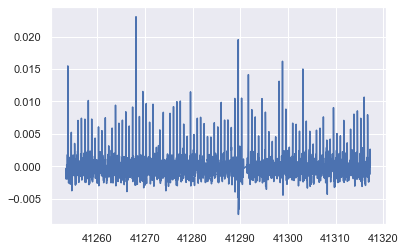

In [35]:
plt.plot(df.UTC, df.XXnormalized)

In [4]:
# known period of B0329 = 0.714 s
print('known f (Hz): ', 1/0.714)

known f (Hz):  1.400560224089636


In [30]:
frequency, power = LombScargle(df.UTC, df.XXnormalized, nterms = 2).autopower(minimum_frequency = 0.01,
                                                                 maximum_frequency = 25,
                                                                 samples_per_peak = 15)
# adding the nterms = 2 significantly improves the ability to find the peak
# the folded data look much better

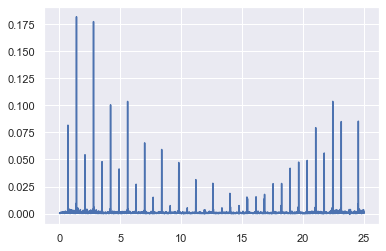

In [36]:
plt.plot(frequency, power)


In [32]:
best_frequency = frequency[np.argmax(power)]
print(best_frequency)

1.3999918010849237


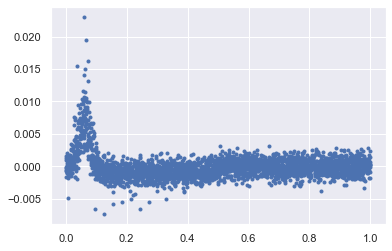

In [37]:
# fold the data 
phase = (df.UTC * best_frequency) % 1

plt.plot(phase, df.XXnormalized, '.')
plt.show()